# 회귀분석

<br>

#### 1. 단순 회귀분석
#### 2. 다중 회귀분석

> <b> 참고 </b> <br/>
: 데이터과학을 위한 통계 - 피터 브루스, 앤드류 부르스 지음 , 한빛미디어 <br/>
: 밑바닥부터 시작하는 데이터 과학 조엘 그르수 지음, 한빛비디어 <br/>
: https://no17.tistory.com/195



<b> 회귀분석이란 <b/>

 <p> 회귀분석이란 수치형 종속변수와 수치형 독립변수사이의 영향 또는 인과관계를 알 수 있는 분석이다. 언뜻 보면 상관관계분석과 비슷한 것 같다. 하지만 상관관계분석은 두 변수간의 상관관계를 수치화할 뿐 각 독립변수가 종속변수에 미치는 영향 또는 관계는 측정이 불가능하다. 우리는 회귀분석을 통해 종속변수에 대한 독립변수의 영향을 알려주는 회귀식을 도출해 낼 수 있다. </p> 
 
<br><br>

> <b> 회귀분석의 전제조건 </b> <br>

첫번째, 독립변수는 동일한 분산을 가져야한다는 등분산성이다.

두번째, 독립변수와 종속변수는 선형관계에 있어야한다.

세번째, 독립변수가 여러개인 경우, 독립변수간이 독립적이여야한다.

네번째, 평균이 0이고 분산이 시그마제곱인 정규성을 가져야한다.

#### 1. 단순회귀분석

> 단순회귀분석이란 하나의 수치형 설명변수가 하나의 수치형 종속변수에 어떤 인과관계 또는 영향을 미치는지에 대한 분석을 말한다. 많은 변수는 고려하지않고 오직 하나의 종속변수(Y)와 하나의 독립변수(X)에 의해서만 시행

> 단순회귀분석을 통해 X가 얼만큼 변하면 Y가 어느 정도 변하는지를 정확히 <b> 추정 </b> 할 수 있다.

> 적합값 (Y Hat)은 예측값을 지칭한다 

> Hat 표기볍은 추정치와 미리 알고 있는 값을 구분하기 위해 사용한다

> 잔차 ei는 원래 값에서 예측한 값을 뺀 값이다

> 회귀분석에서 회귀 모형 추정을 하기 위한 회귀 직선을 구하는 방법 중 하나로 <b> 최소제곱법 </b>이 있다. 최소제곱법은 잔차들의 제곱합인 잔차제곱합(RSS)을 최소화하는 선을 말한다

> 회귀식의 적합도를 측정하는 척도로 결정계수(R 제곱 통계량)이 있다. 결정계수의 범위는 0에서 1까지이며 <b> 1에 가까울수록 </b> 모형의 설명력이 높다고 판단한다.(모델 데이터의 변동률 측정 , 모델이 데이터에 얼마나 적합한가) 결정계수의 값이 너무 낮은경우의 모형 해석은 의미가 없다. 

> 회귀분석결과 도출된 회귀식이 유의하지 않다면 해석을 하는 의미가 없을 것이다. 따라서, 도출된 회귀식이 통계적으로 유의한지 확인해야한다. t통계량( * p값)은 계수가 <b> 통계적으로 유의미한 정도 </b> 즉, 예측변수와 목표변수를 랜덤하게 재배치했을 경우 우연히 얻을 수 있는 범위를 어느 정도 벗어났는지를 측정한다. t 통계량이 높을수록 (p 값이 낮을수록) 예측변수는 더욱 유의미하다. 

In [1]:
## 단순회귀분석 실습(

# DataSet => 먼지(Exposure)에 노출된 연수와 폐활량(PEFR) 사이의 관계 분석

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
data = pd.read_csv('../Data/LungDisease.csv', engine='python')

In [14]:
data.head()

,PEFR,Exposure
0,390,0
1,410,0
2,430,0
3,460,0
4,420,1


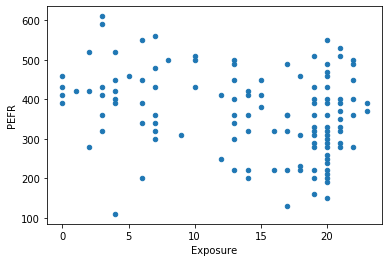

In [15]:
## 산점도

data_scatter = data.plot.scatter(x='Exposure',y='PEFR')

In [3]:
## 다양한 통계 모델을 평가하고 통계 테스트를 수행하고 통계 데이터를 탐색하는 데 필요한 클래스와 함수를 제공하는 Python모듈 
## 최소제곱법을 활용한 선형회귀분석
# import statsmodels.api as sm
# import statsmodels.formula.api as smf

model = smf.ols(formula = 'PEFR ~ Exposure ', data = data) # smf(statsmodel의 ols(최소제곱법)을 사용하여 회귀모형 생성 ) #Formula = '종속변수 ~ 독립변수
result = model.fit() # 모형 적합화
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   PEFR   R-squared:                       0.077
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     9.974
Date:                Tue, 17 Sep 2019   Prob (F-statistic):            0.00201
Time:                        10:47:53   Log-Likelihood:                -735.68
No. Observations:                 122   AIC:                             1475.
Df Residuals:                     120   BIC:                             1481.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    424.5828     20.796     20.417      0.000     383.408     465.757
Exposure      -4.1846      1.325     -3.158      0.002      -6.808      -1.561
==============================================================================
Omnibus:                        0.767   Durbin-Watson:                   1.111
Prob(Omnibus):                  0.681   Jarque-Bera (JB):                0.891
Skew:                          -0.162   Prob(JB):                        0.641
Kurtosis:                       2.734   Cond. No.                         35.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

> <b>단순회귀분석 결과의 해석 </b>

1. 결정계수 확인
2. 모형의 적합도 확인
3. 회귀계수 확인
4. t값과 t값의 유의확률 확인

<br>

* 결정계수의 경우(R-squared)의 경우 0.077로 이는, 회귀모형의 설명력이 7.7%라는것을 의미 (매우 낮음)
* F값 9.974 와 P>|t|(유의확률) 0.000으로 ???
* 기울기(방문빈도)는 -4.1846    # P>|t| 0.002 유의
* Intercept는 424.5828          # P>|t| 0.000 유의

<b> 먼지에 노출되는 연수가 1씩 증가할 때마다, PEFR은 -4.185의 비율로 줄어든다 </b>



#### 2. 다중회귀분석

> 다중회귀분석이란 하나의 <b> 수치형 종속변수와 2개이상의 수치형 독립변수 사이의 영향 또는 인과관계를 설명 </b> 하는 분석을 말한다

> 단순회귀모형에서와 마찬가지로 잔차제곱합을 최소화하는 최소제곱법에 의해 회귀모형을 추정할 수 있다(회귀 직선)

> 다중회귀분석은 단순회귀분석과는 달리 독립변수가 2개이상 들어간다. 독립변수의 수는 그 수가 많을 수록 결정계수 값이 올라가는 특성이 있다. 이를 보완한 것이 <b> 수정된 결정계수(Adjusted R-squared) </b> 이다. 즉, 다중회귀분석 시 "수정된 결정계수를 통해 모형의 설명력을 판단한다

<b> 다중공선성 </b>
* <b> 다중공선성이란 </b> 독립변수들 간의 완전한 선형종속의 관계를 말한다. 다중회귀분석시 독립변수를 선택을 했다면 이 독립변수들 간에 상관관계가 존재하는지 확인해야한다
* 즉, 다중공선성이 존재한다면 독립변수들이 독립적이지 못하다는것을 의미하므로 회귀모형 예측이 불가능하다 <br><br>

![다중공선성 존재 판단기준](https://user-images.githubusercontent.com/35517797/62457173-2937d800-b7b5-11e9-9bf1-e0b9aa38a332.jpg)

<br><br>

<b> < 다중공선성 문제 해결 방안 > </b>
* 다중공선성이 의심되는 변수를 제거한다
* 독립변수 입력방식을 바꿔본다
* 독립변수들을 요인으로 묶어 분석을 한다
    
<br><br>

<b> 독립변수의 선택 </b>

![다중회귀분석 독립변수 선택 방법](https://user-images.githubusercontent.com/35517797/62457204-3bb21180-b7b5-11e9-8e7c-0157ec76a6d7.png)

In [7]:
##다중회귀분석 실습

# DataSet => OPS 추정, AB(타석),avg(타율), H(홈런)

tmp = pd.read_csv('../Data/Regular_Season_Batter.csv')
data_2 = tmp[['OPS','AB','avg','H']]

model_2 = smf.ols(formula = 'OPS ~ AB+avg+H', data = data_2) # smf(statsmodel의 ols(최소제곱법)을 사용하여 회귀모형 생성 ) #Formula = '종속변수 ~ 독립변수
result = model_2.fit() # 모형 적합화
result.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    OPS   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.857
Method:                 Least Squares   F-statistic:                     4865.
Date:                Tue, 17 Sep 2019   Prob (F-statistic):               0.00
Time:                        10:48:03   Log-Likelihood:                 2176.7
No. Observations:                2428   AIC:                            -4345.
Df Residuals:                    2424   BIC:                            -4322.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0729      0.006     12.772      0.000       0.062       0.084
AB          6.698e-05      7e-05      0.957      0.339   -7.02e-05       0.000
avg            2.2723      0.024     94.251      0.000       2.225       2.320
H              0.0004      0.000      1.806      0.071   -3.58e-05       0.001
==============================================================================
Omnibus:                     1323.456   Durbin-Watson:                   1.569
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           198211.683
Skew:                           1.534   Prob(JB):                         0.00
Kurtosis:                      47.157   Cond. No.                     3.37e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
tmp.head(2)

,batter_id,batter_name,year,team,avg,G,AB,R,H,2B,...,GDP,SLG,OBP,E,height/weight,year_born,position,career,starting_salary,OPS
0,0,가르시아,2018,LG,0.339,50,183,27,62,9,...,3,0.519,0.383,9,177cm/93kg,1985년 04월 12일,내야수(우투우타),쿠바 Ciego de Avila Maximo Gomez Baez(대),NaN,0.902
1,1,강경학,2011,한화,0.000,2,1,0,0,0,...,0,0.000,0.000,1,180cm/72kg,1992년 08월 11일,내야수(우투좌타),광주대성초-광주동성중-광주동성고,10000만원,0.000


In [8]:
## 다중공선성 여부 확인

from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor

features = "AB + avg + H"

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

NameError: name 'X' is not defined

<b>  다중공선성 여부 확인 </b>

* AB와 H의 경우 10 이상으로 다중공선성을 보인다. 따라서 해당 독립변수가 독립적이지 않다고 볼 수 있다.

#### 회귀 모형의 선택

> 회귀분석의 경우 많은 변수를 예측변수로 사용할 수 있다. 그러나, 많은 변수를 추가한다고 해서 꼭 더 좋은 모델을 얻는 것은 아니다.

> " 모든 것이 동일한 조건에서는 복잡한 모델보다는 단순한 모델을 우선 사용해야 한다" <b>  [ -  오컴의 면도날](https://ko.wikipedia.org/wiki/%EC%98%A4%EC%BB%B4%EC%9D%98_%EB%A9%B4%EB%8F%84%EB%82%A0) </b>

> 변수를 추가하면 항상 RMSE( *제곱근 평균오차, 전반적인 모델의 정확도 측정과 다른 모델과의 비교기준 )는 증가하고 R-squred는 감소한다

> 따라서 AIC(모델에 항을 추가할수록 불이익을 주는 측정 기준)를 최소화하는 모델 선택이 필요하다

<br>

1. 회귀분석의 결과에서 P|t| 값이 가장 높은 항 빼기
2. 벌점회귀 (lasso) 